In [10]:
import pandas as pd

df=pd.read_csv('Sales-Export_2019-2020.csv')

df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [11]:
df.describe(include='O')

,country,order_value_EUR,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,15,1000,536,10,75,15,35,3,1000
top,Portugal,"17,524.02",3/1/2020,Clothing,Johns and Sons,Celine Tumasian,Amelina Piscopiello,PC,70-0511466
freq,239,1,5,155,142,239,56,785,1


In [122]:
df.shape

(1000, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [13]:
df.columns=df.columns.str.strip(' ')

df.columns

Index(['country', 'order_value_EUR', 'cost', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [14]:
df.nunique()

country              15
order_value_EUR    1000
cost               1000
date                536
category             10
customer_name        75
sales_manager        15
sales_rep            35
device_type           3
order_id           1000
dtype: int64

In [36]:
df['order_value_EUR'] = df['order_value_EUR'].str.replace(' ','').astype(float)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1000 non-null   object 
 1   order_value_EUR  1000 non-null   float64
 2   cost             1000 non-null   float64
 3   date             1000 non-null   object 
 4   category         1000 non-null   object 
 5   customer_name    1000 non-null   object 
 6   sales_manager    1000 non-null   object 
 7   sales_rep        1000 non-null   object 
 8   device_type      1000 non-null   object 
 9   order_id         1000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 78.2+ KB


In [38]:
df['Profit'] = df['order_value_EUR'] - df['cost']

In [43]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
Profit             0
dtype: int64

In [56]:
best_seller = df.groupby(['order_value_EUR','sales_manager'],as_index=False)['category'].nunique()
best_seller = best_seller.sort_values(by=['order_value_EUR'],ascending=False)
best= best_seller[:10]
print(best)

     order_value_EUR    sales_manager  category
999        383996.76  Jessamine Apark         1
998        361182.87  Glenine Suttaby         1
997        353925.06    Denice Amberg         1
996        325331.99     Maxie Marrow         1
995        312928.72         Ilsa Kob         1
994        310539.00    Othello Bowes         1
993        308763.51  Jessamine Apark         1
992        304337.49  Jessamine Apark         1
991        296844.24     Maxie Marrow         1
990        296465.56  Celine Tumasian         1


In [88]:
Country_by_target = df.groupby(['country'],as_index=False)['Profit'].value_counts()


print(Country_by_target)

     country    Profit  count
0    Austria  10350.99      1
1    Austria  25367.39      1
2    Belgium   5747.24      1
3    Belgium  13451.43      1
4    Belgium  14566.33      1
..       ...       ...    ...
995       UK  23489.48      1
996       UK  24386.31      1
997       UK  24932.10      1
998       UK  25455.26      1
999       UK  79295.33      1

[1000 rows x 3 columns]


In [89]:
import plotly.express as px
import folium
import seaborn as sns
px.choropleth(Country_by_target,
              locationmode='country names',
              locations = 'country',
              color = 'Profit'


)

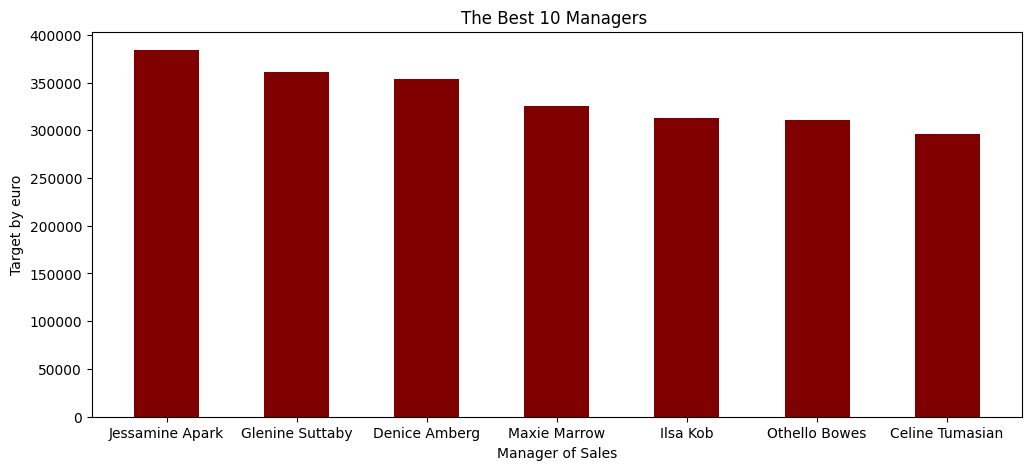

In [94]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
x = best['sales_manager']
y = best['order_value_EUR']
plt.bar(x,y,width=0.5,color='maroon')
plt.xlabel('Manager of Sales')
plt.ylabel('Target by euro')
plt.title('The Best 10 Managers ')
plt.show()

In [95]:
df['category'].unique()

array(['Books', 'Games', 'Clothing', 'Beauty', 'Accessories',
       'Appliances', 'Smartphones', 'Outdoors', 'Electronics', 'Other'],
      dtype=object)

In [119]:
def category(name):
   cdf=df.loc[df['category']==name]
   pdf=cdf.loc[:,['Profit','country']]
   cpdf=pdf.groupby(['country'],as_index=False).sum()
   fig=plt.figure(figsize=(15,8))
   ppdf=cpdf.sort_values(by='Profit',ascending=False)
   sns.barplot(ppdf,x='country',y='Profit')
   plt.xlabel('Countries')
   plt.ylabel('Profit')
   plt.title(f'the Profit in Countries by {name}')


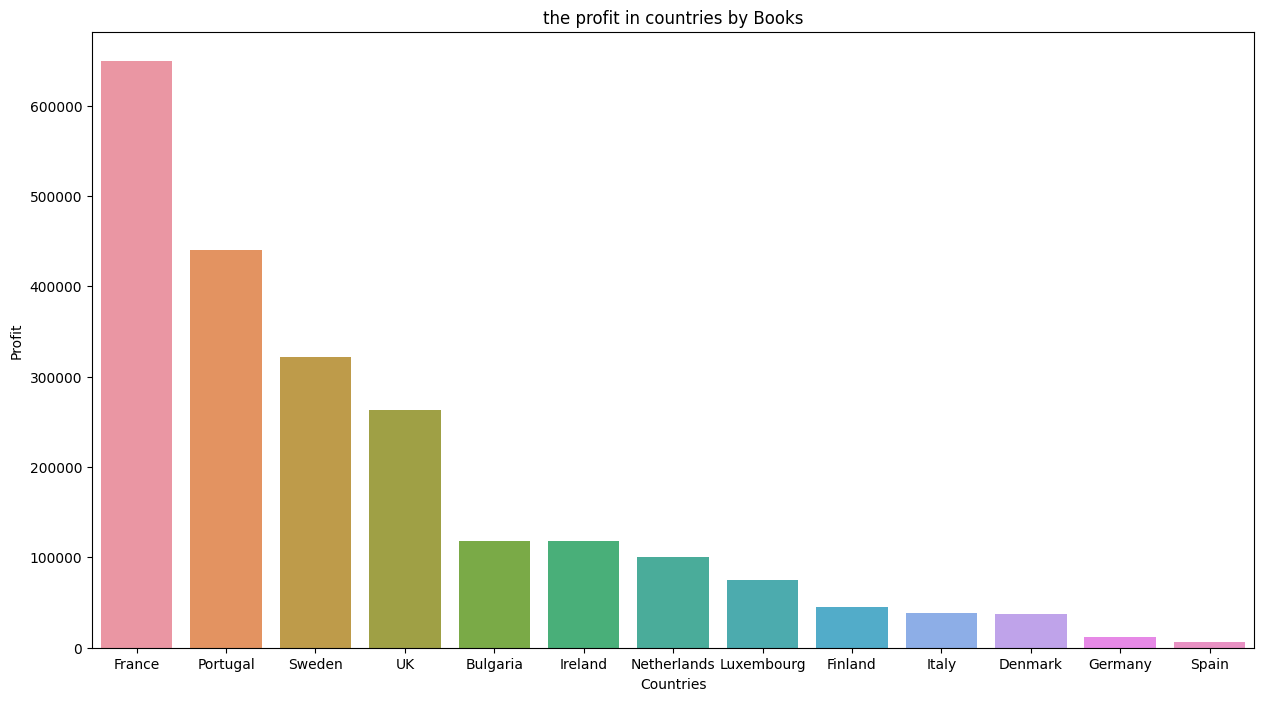

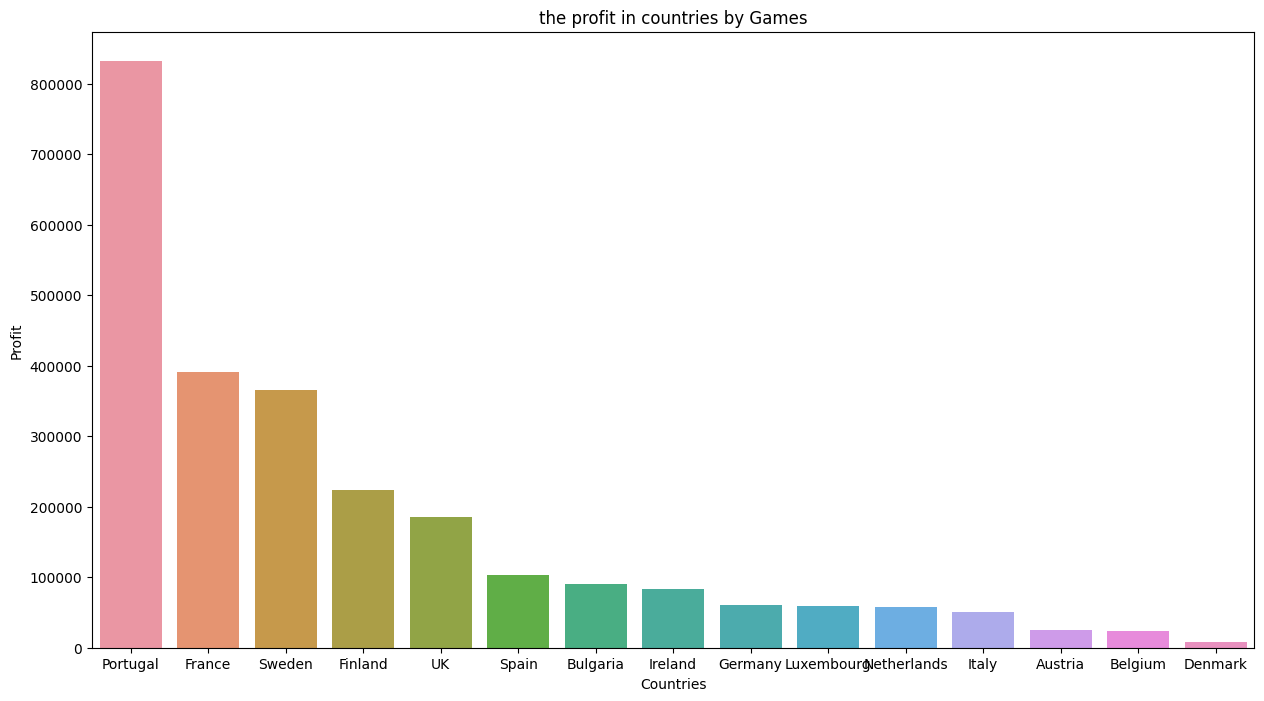

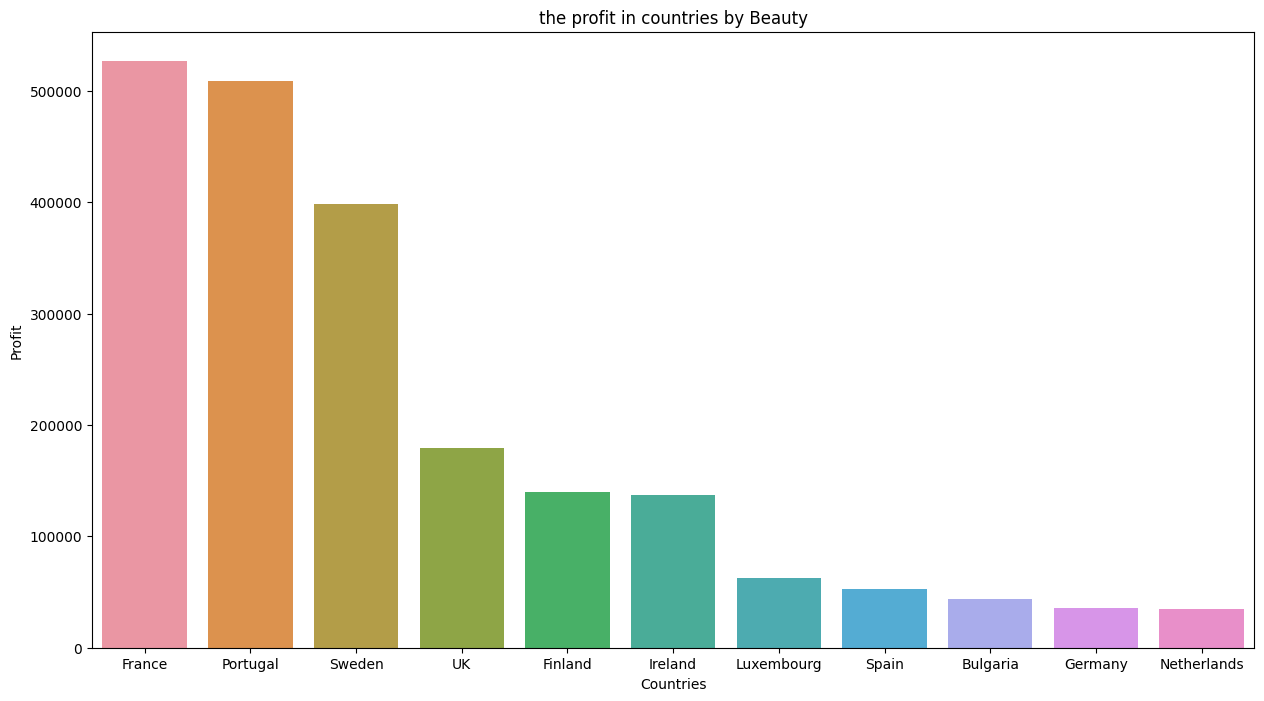

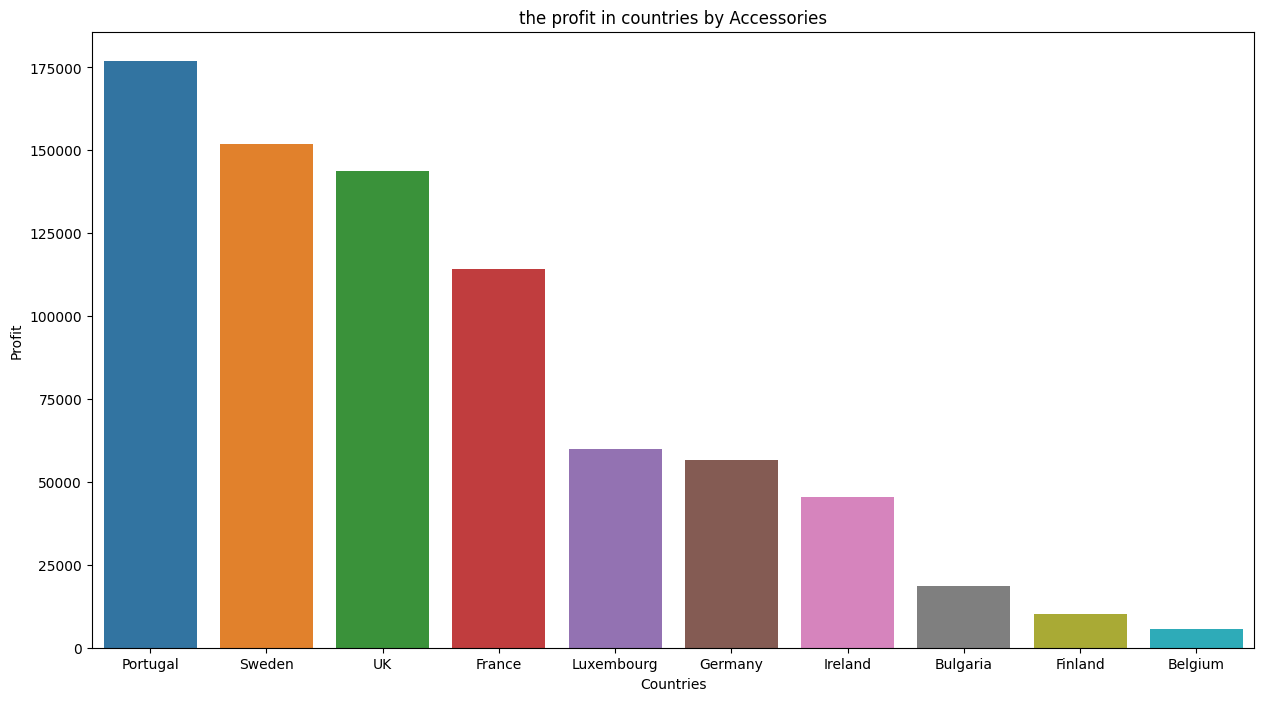

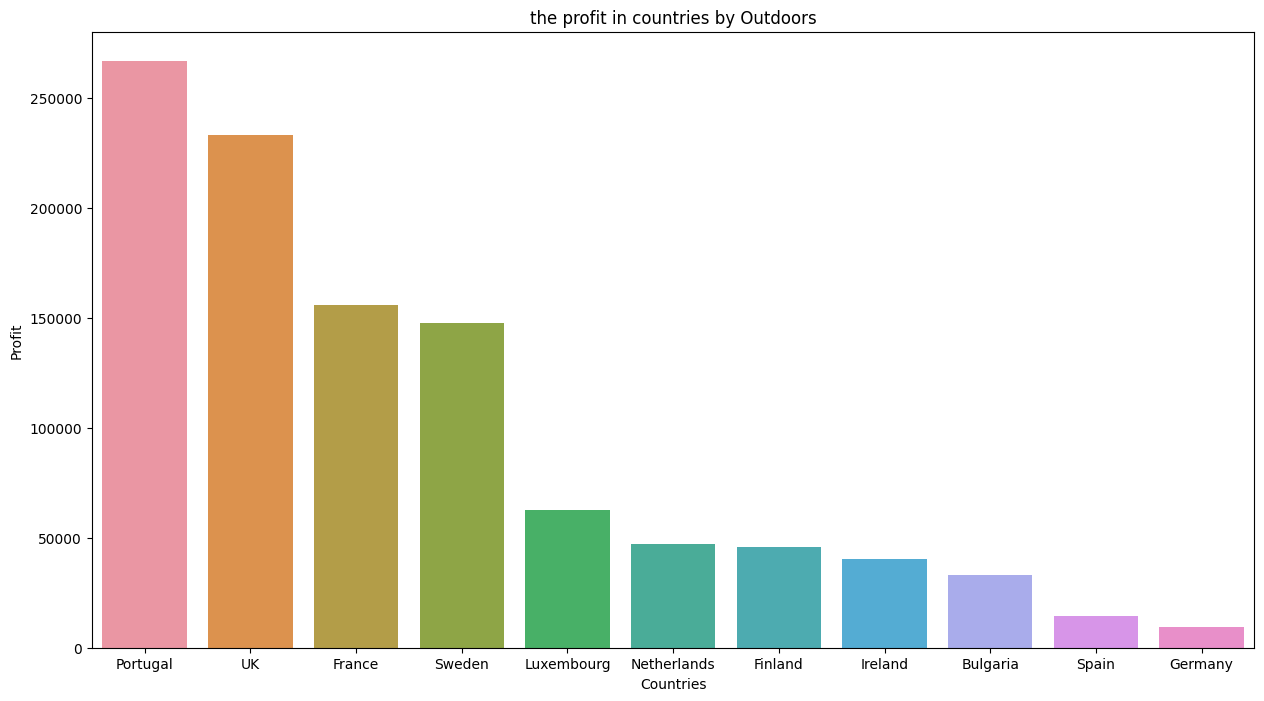

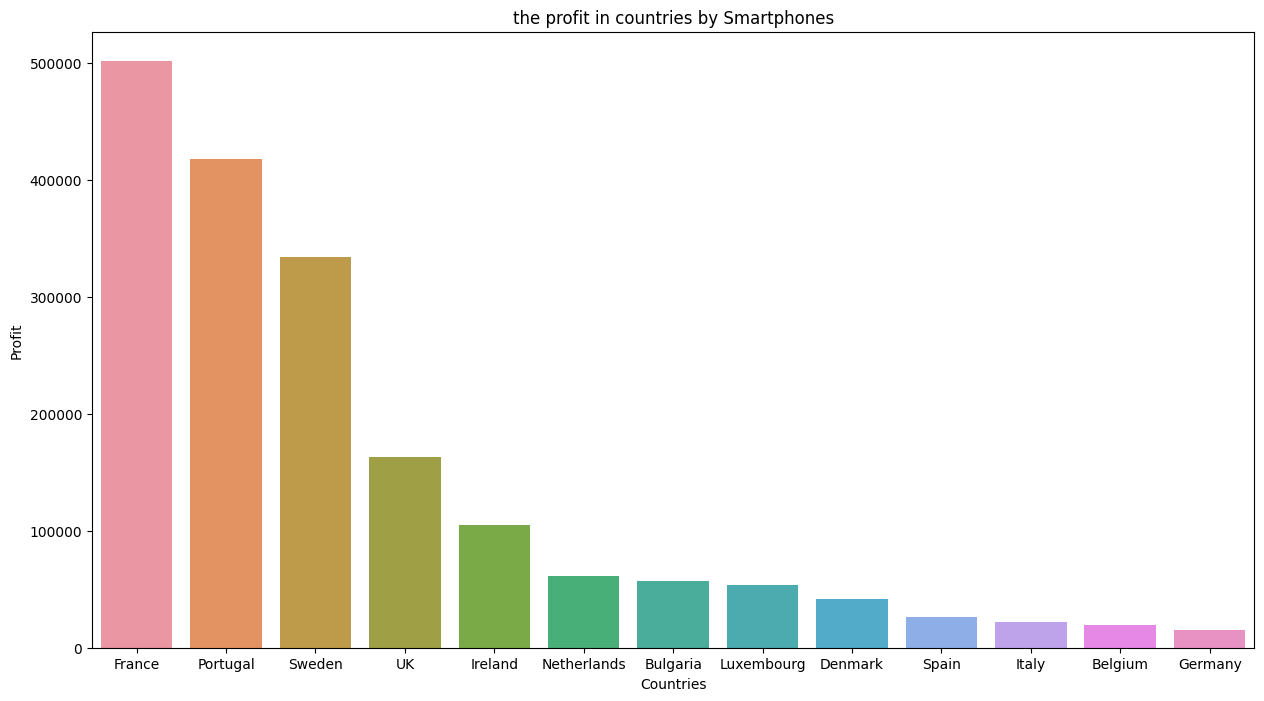

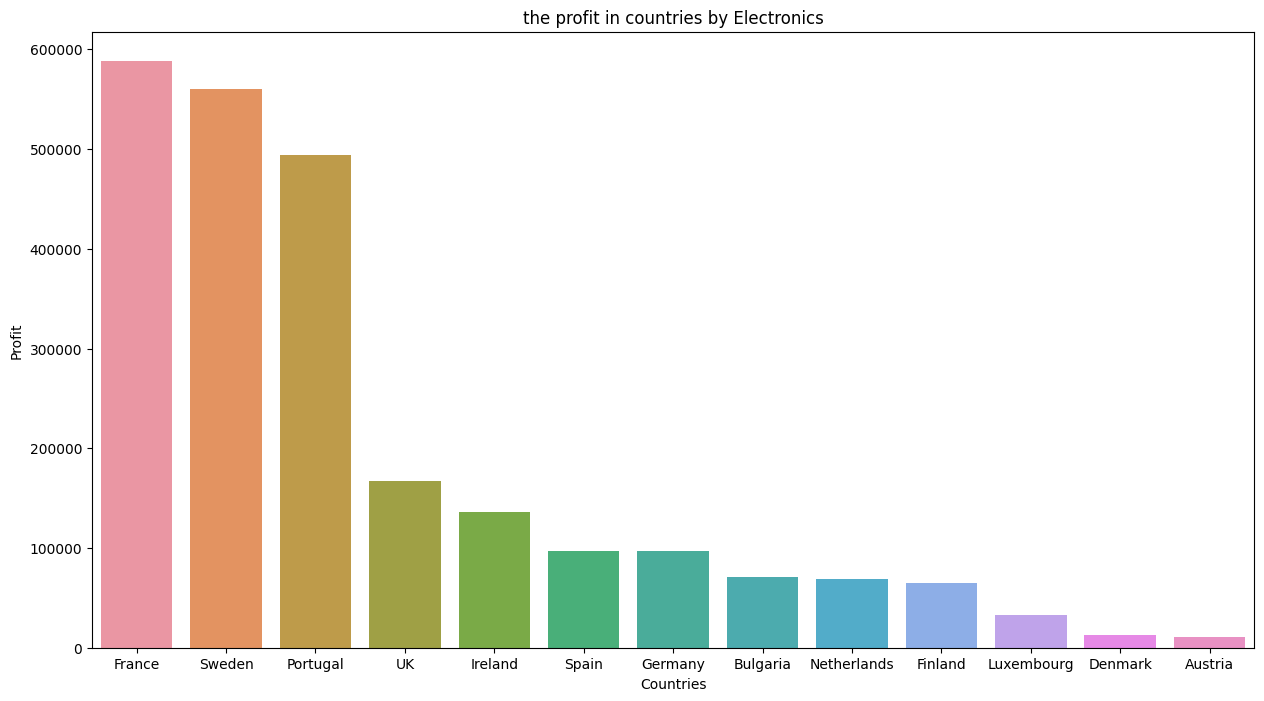

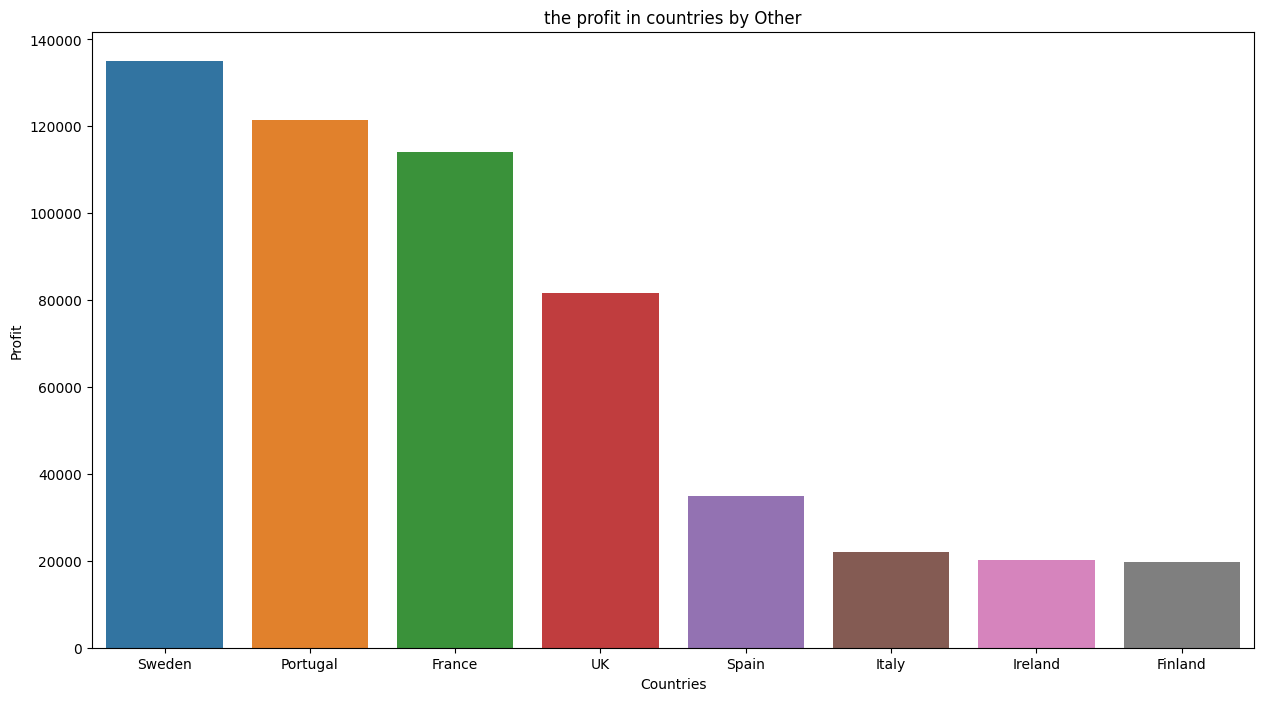

In [120]:
category('Books')
category('Games')
category('Beauty')
category('Accessories')
category('Outdoors')
category('Smartphones')
category('Electronics')
category('Other')


<Axes: xlabel='country', ylabel='Profit'>

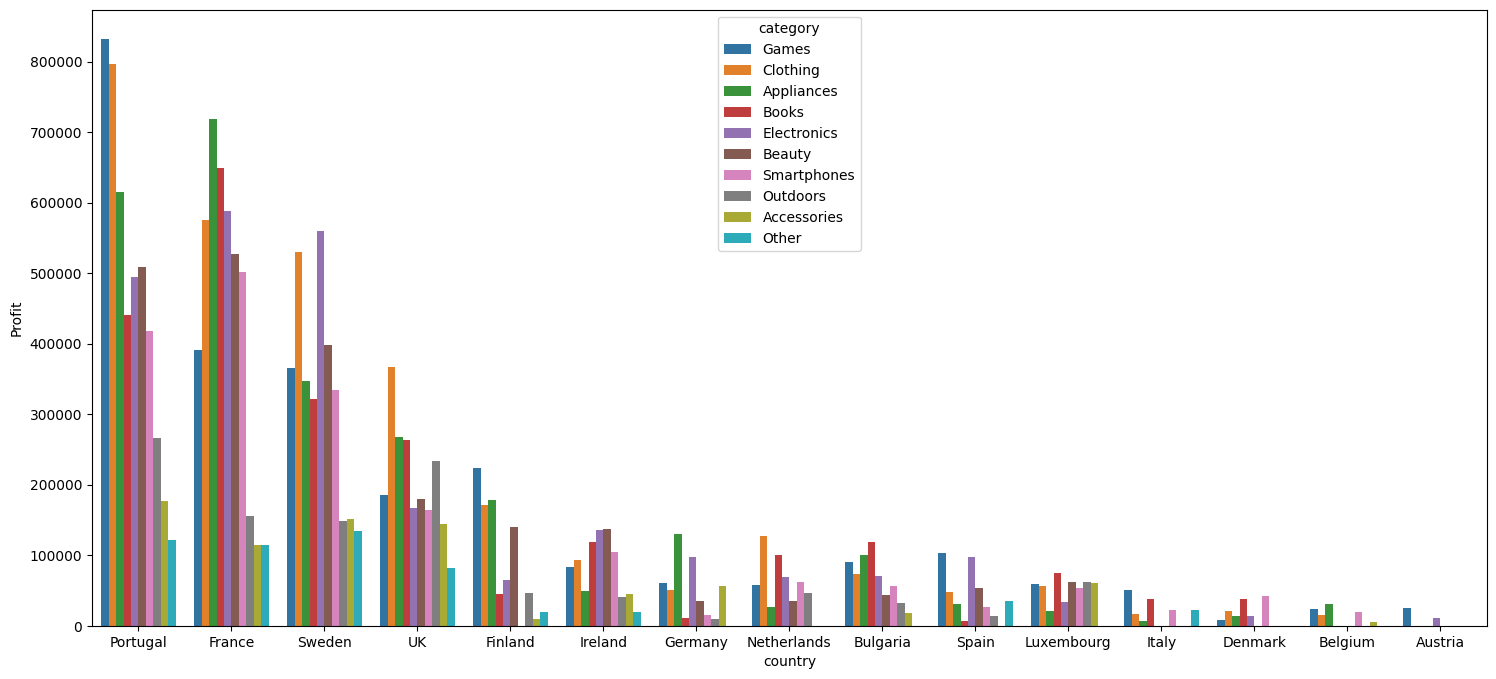

In [171]:
dff=df.loc[:,['category','country','Profit']]
aad=dff.groupby(['category','country'],as_index=False).sum().sort_values(by='Profit',ascending=False)
fig = plt.figure(figsize=(18,8))
sns.barplot(aad,x='country',y='Profit',hue='category')

In [133]:
df['Year'] = df['date'].apply(lambda x:x[:-6])
df['Year'].head()

0    2020
1    2019
2    2019
3    2020
4    2019
Name: Year, dtype: object

In [135]:
df['date']=pd.to_datetime(df['date'])

In [150]:
Category_by_Year = df.groupby(['category','Profit','Year'],as_index = False)['order_id'].nunique()
Category_by_Year = Category_by_Year.sort_values(by='Profit',ascending=False)
print(Category_by_Year)

        category    Profit  Year  order_id
854        Other  79295.33  2019         1
397        Books  72814.47  2019         1
552     Clothing  66396.34  2020         1
904     Outdoors  63049.51  2020         1
686  Electronics  62263.07  2020         1
..           ...       ...   ...       ...
400     Clothing   2925.44  2020         1
553  Electronics   2817.50  2019         1
399     Clothing   2474.41  2020         1
826        Other   2428.39  2020         1
398     Clothing   2073.61  2019         1

[1000 rows x 4 columns]


In [146]:
for y in Category_by_Year['Year'].unique():
  data = Category_by_Year[Category_by_Year['Year']==y]
  fig = px.bar(data,x='category',y='Profit',title=f'The Profit of Category by {y}')
  fig.show()

In [163]:
DT=df.groupby(['device_type'],as_index=False)['country'].value_counts()
print(DT)

   device_type      country  count
0       Mobile     Portugal     42
1       Mobile       France     26
2       Mobile       Sweden     25
3       Mobile           UK     11
4       Mobile      Ireland     10
5       Mobile      Germany      6
6       Mobile      Finland      4
7       Mobile        Spain      4
8       Mobile     Bulgaria      4
9       Mobile        Italy      3
10      Mobile  Netherlands      3
11      Mobile      Belgium      3
12      Mobile   Luxembourg      1
13          PC       France    190
14          PC     Portugal    179
15          PC       Sweden    145
16          PC           UK     82
17          PC      Finland     33
18          PC      Ireland     32
19          PC     Bulgaria     25
20          PC  Netherlands     23
21          PC        Spain     19
22          PC   Luxembourg     19
23          PC      Germany     16
24          PC      Denmark     11
25          PC        Italy      6
26          PC      Belgium      3
27          PC      

In [164]:
for i in DT['country']:
  count = DT[DT['country'] == i]
  fig = px.pie(count,values='count',names='device_type',title=f'The Devices uses in {i}')
  fig.show()

In [195]:
dc=df.groupby(['cost','category'],as_index=False)['country'].value_counts()
dc=dc.sort_values(by='cost',ascending=True)
print(dc)

          cost     category      country  count
0     12113.68        Games       Sweden      1
1     13430.70  Electronics       France      1
2     13743.44     Clothing       Sweden      1
3     14102.75     Clothing  Netherlands      1
4     14122.61        Books       Sweden      1
..         ...          ...          ...    ...
995  264592.51        Games       Sweden      1
996  270401.71       Beauty   Luxembourg      1
997  287528.72     Clothing  Netherlands      1
998  288368.40        Books      Ireland      1
999  304701.43        Other           UK      1

[1000 rows x 4 columns]


Text(0, 0.5, 'Category')

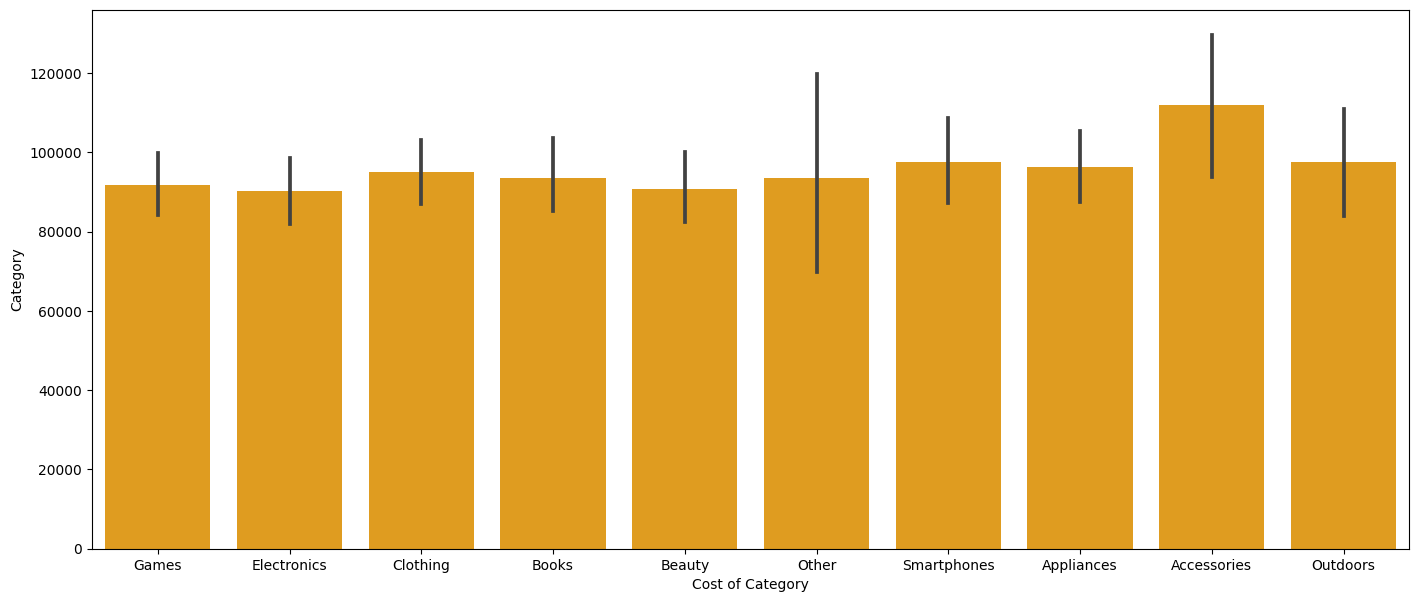

In [197]:
fig=plt.figure(figsize=(17,7))
sns.barplot(dc,x='category',y='cost',color='orange')
plt.xlabel('Cost of Category')
plt.ylabel('Category')


<Axes: xlabel='Profit', ylabel='customer_name'>

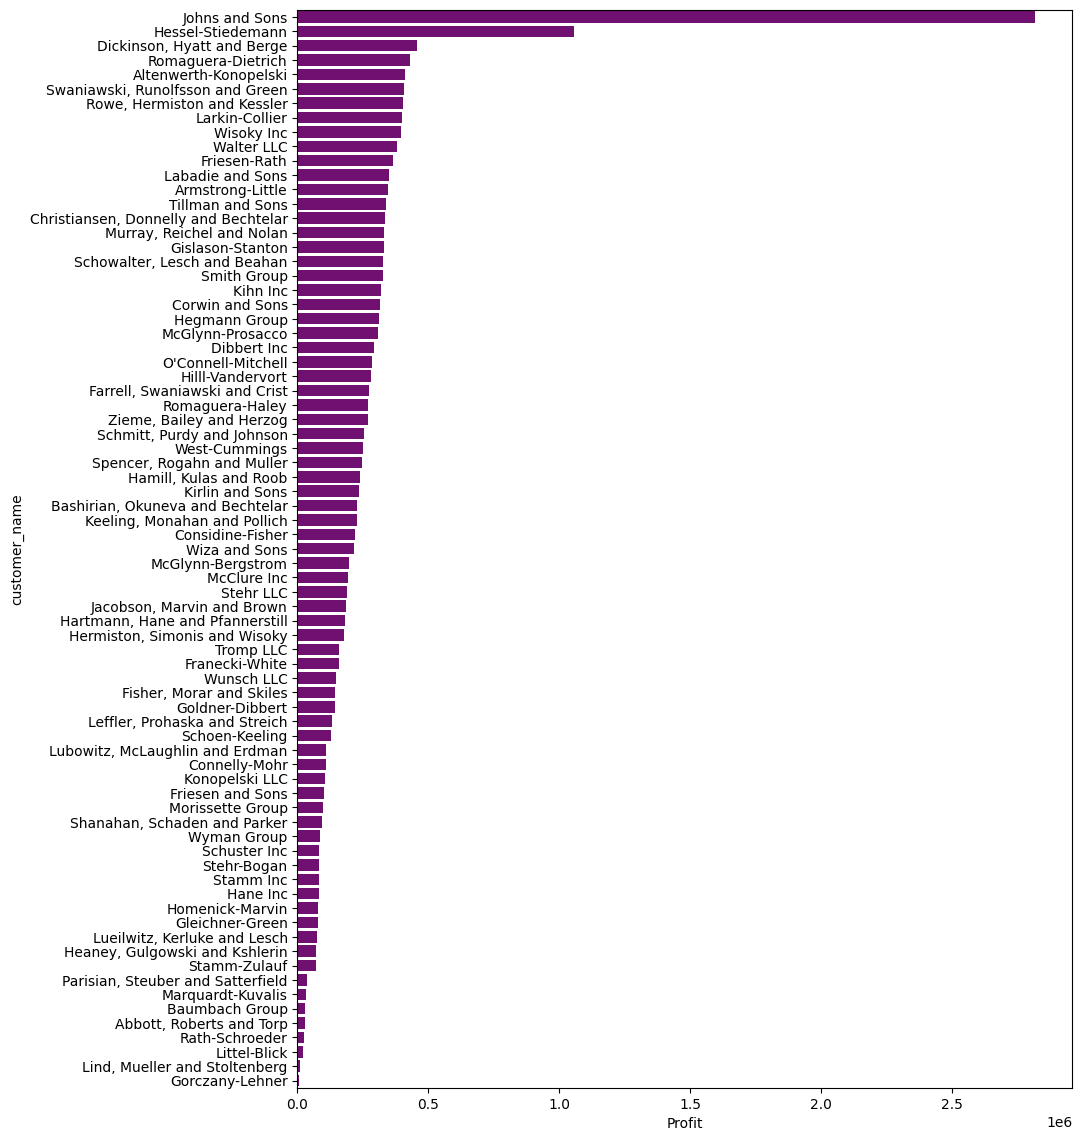

In [211]:
adf=df.loc[:,['customer_name','Profit']]
vdf=adf.groupby(['customer_name'],as_index=False).sum().sort_values(by='Profit',ascending=False)
fig = plt.figure(figsize=(10,14))
sns.barplot(vdf,x='Profit',y='customer_name',color='purple')

In [239]:
mdf=df.groupby(['sales_manager','category','Profit'],as_index=False)['category'].value_counts()
mdf=mdf.sort_values(by='Profit',ascending=False)


print(mdf)

       sales_manager     category    Profit  count
514  Jessamine Apark        Other  79295.33      1
335  Glenine Suttaby        Books  72814.47      1
281    Denice Amberg     Clothing  66396.34      1
524  Jessamine Apark     Outdoors  63049.51      1
900    Othello Bowes  Electronics  62263.07      1
..               ...          ...       ...    ...
276    Denice Amberg     Clothing   2925.44      1
644     Maxie Marrow  Electronics   2817.50      1
89   Celine Tumasian     Clothing   2474.41      1
513  Jessamine Apark        Other   2428.39      1
612     Maxie Marrow     Clothing   2073.61      1

[1000 rows x 4 columns]


Text(0.5, 1.0, 'Number of Category  transaction by Sales Manager ')

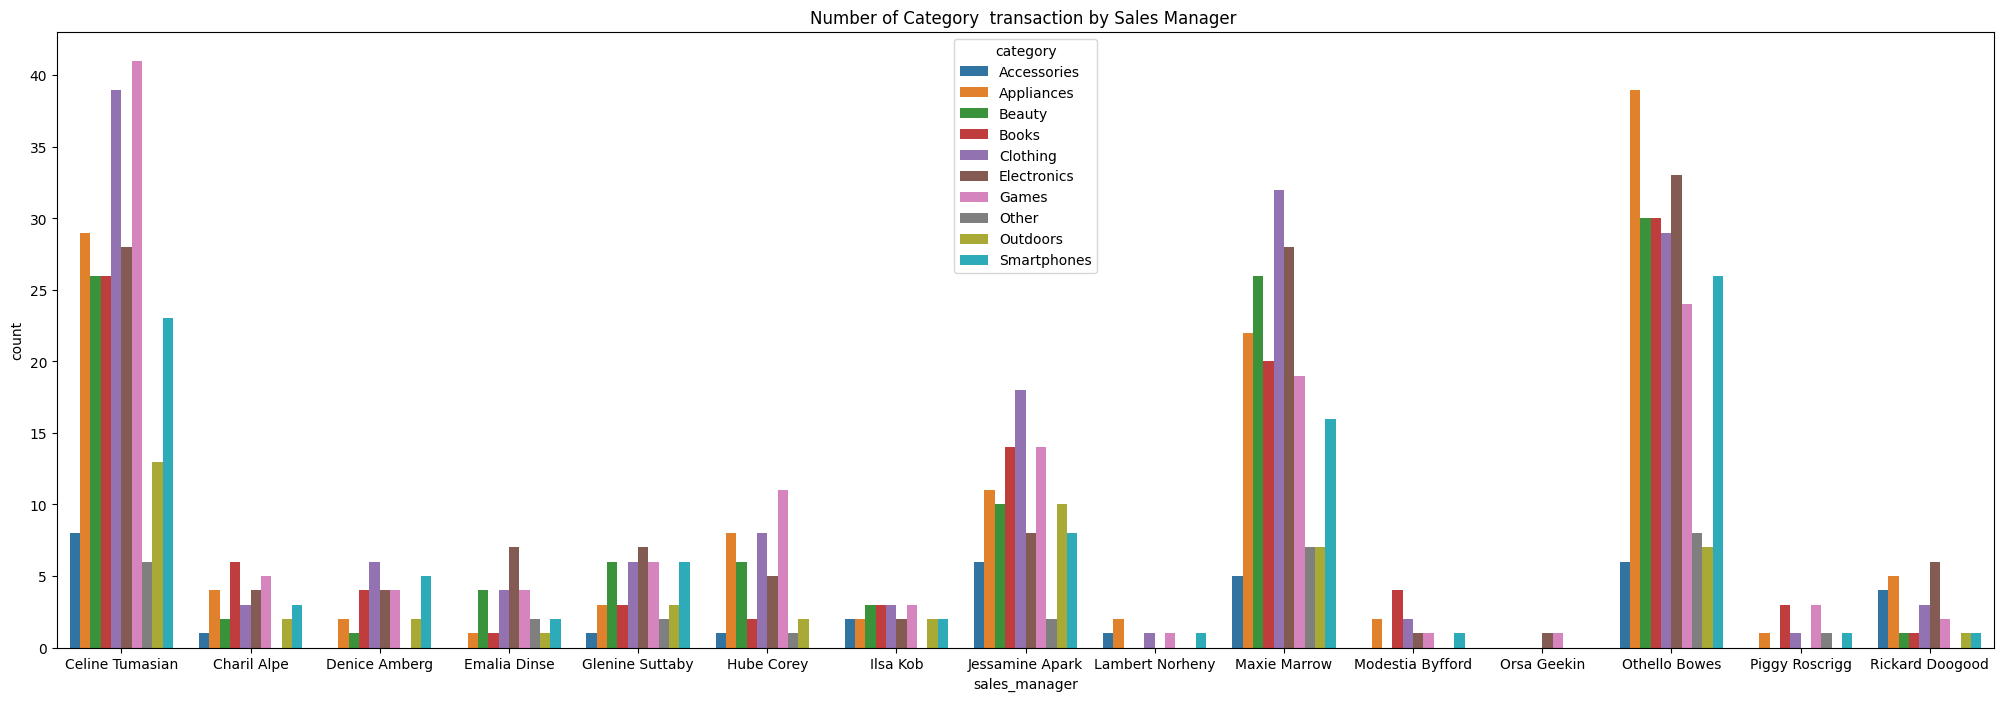

In [225]:
fig=plt.figure(figsize=(25,8))

sns.barplot(mdf,x='sales_manager',y='count',hue='category')
plt.title('Number of Category  transaction by Sales Manager ')

In [241]:
for z in mdf['category'].unique():
  data = mdf[mdf['category'] == z]
  fig=px.bar(data,x='sales_manager',y='Profit',title=f'The Profit of {z} by Sales managers')
  fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
  fig.show()